# Understanding SVD

Diagonalisation of square matrix ??

Summary:
- 1. Definition of Singuar Values Decomposition
- 2. Linear Regression
- 3. SVD applied to image compression
- 4. SVD applied to function approximation
- 5. PCA

In [ ]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression

# Reproducibility
np.random.seed(15)

## 1. Definition of Singuar Values Decomposition

**Singular Value Decomposition Theorem:** Let $A$ be a real (or complex) $m \times n$ matrix. The Singular Value Decomposition (SVD) of $A$ is a factorization of the form:
$$
\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T \qquad \text{with} \qquad {\mathbf{\Sigma}} = \begin{bmatrix}
    \sigma_1 & 0 & \cdots & 0   \\
    0 & \sigma_2 & \ddots & \vdots \\
    \vdots & \ddots & \ddots & 0 \\
    \vdots & & \ddots &  \sigma_m\\
    \vdots &  &  &  0 \\
    0 & \cdots & \cdots & 0
\end{bmatrix} \in \mathbb{R}^{m \times n}
$$

where:
- $U \in \mathbb{R}^{m \times m}$ is an orthogonal matrix, i.e., $U^T U = I_m$. Its columns are the left singular vectors of $A$.
- $V \in \mathbb{R}^{n \times n}$ is an orthogonal matrix, i.e., $V^T V = I_n$. Its columns are the right singular vectors of $A$.
- $\Sigma \in \mathbb{R}^{m \times n}$ is a diagonal matrix with the *singular values* of $\sigma_i$ on the diagonal.

The matrix $\Sigma$ has been represented in the case $n > m$. The $\sigma_i$ are called the singular values of $\mathbf{A}$. They are the square roots of the eigenvalues of the matrix ${\mathbf{A}}^H{\mathbf{A}}$. They are necessarily *real, positive, or zero*; they can be arranged in any order, but for a given order, the decomposition is unique. From now on, we choose descending order: $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0$ (where $r = \operatorname{rank}(A)$)

The result can also be written as:  
$${\mathbf{A}} = {\mathbf{U}}{\mathbf{\Sigma}}{\mathbf{V}}^T = \sum_{i=1}^r \sigma_i {\mathbf{u}}_i {\mathbf{v}}_i^T$$  
which expresses the matrix as the sum of $\operatorname{rank}({\mathbf{A}})$ matrices of rank-1 contributions.



### Geometric Interpretation

The SVD provides a geometric interpretation of the action of the matrix $A$: it maps the unit sphere in $\mathbb{R}^n$ to an ellipsoid in $\mathbb{R}^m$, where the axes of the ellipsoid are scaled by the singular values and oriented along the left singular vectors.

### Applications of SVD

SVD is a fundamental tool in linear algebra with applications in:

- Principal Component Analysis (PCA)
- Signal processing and data compression
- Solving ill-posed linear systems
- Latent Semantic Analysis (LSA) in natural language processing



### Algorithm

We will now code the SVD in the case of a real square matrix. We therefore write ${\mathbf{A}} = {\mathbf{U}}{\mathbf{\Sigma}}{\mathbf{V}}^T$. The computation of the SVD consists in finding the eigenvalues and eigenvectors of $\mathbf{A}\mathbf{A}^T$ and $\mathbf{A}^T\mathbf{A}$. The eigenvectors of $\mathbf{A}^T\mathbf{A}$ form the columns of $\mathbf{V}$, while the eigenvectors of $\mathbf{A}\mathbf{A}^T$ form the columns of $\mathbf{U}$. As stated earlier, the singular values in $\mathbf{\Sigma}$ are the square roots of the eigenvalues of either $\mathbf{A}\mathbf{A}^T$ or $\mathbf{A}^T\mathbf{A}$.

The singular values are the diagonal entries of the matrix $\mathbf{\Sigma}$ and are sorted in decreasing order, and the eigenvectors in U and V matrices are reordered accordingly. Since in this case $\mathbf{A}$ is a real matrix, both $\mathbf{U}$ and $\mathbf{V}$ are also real. Finally, we must not forget that we must have:  
$${\mathbf{A}}\mathbf{V} = \mathbf{U}\mathbf{\Sigma}$$


In [88]:
n = 6
A = np.random.random((n, n))

def svd(A):
    S, U = la.eigh(A.dot(A.T))
    S, V = la.eigh(A.T.dot(A))
    S = np.sqrt(S)
    idx = S.argsort()[::-1]
    S = S[idx]
    U = U[:,idx]
    V = V[:,idx]
    # matrix of 1's and -1's to satisfy the equality AV = US
    MS = 2 * np.isclose(A.dot(V), (U.dot(np.diag(S)))) - 1
    V = MS * V
    return U, S, V


# custom function call
U, S, V = svd(A)
S = np.diag(S) # vector to matrix

# SVD using numpy's built-in function
Unp, Snp, Vnp = la.svd(A)
Snp = np.diag(Snp)

print(np.allclose(A, U.dot(S.dot(V.T))))
print(np.allclose(A, Unp.dot(Snp.dot(Vnp))))

True
True


## 2. Linear Regression

Linear regression aims to find the parameter vector $ \Theta \in \mathbb{R}^d $ that best fits a set of observations $ (X, y) $, where $X \in \mathbb{R}^{n \times d} $ is the design matrix and $ y \in \mathbb{R}^n $ is the vector of target values. The model assumes a linear relationship given by the matrix equation:
$$
X \Theta = y.
$$
When $ X $ does not have full column rank or when the system is overdetermined (i.e., $ n > d $), the equation may not have an exact solution. In such cases, we seek the least-squares solution that minimizes the squared error $ \| X \Theta - y \|_2^2 $. The analytical solution is given by:
$$
\Theta = X^{+} y,
$$
where $ X^{+} $ denotes the Moore–Penrose pseudoinverse of $ X $. To compute $ X^{+} $, we can use the singular value decomposition (SVD). Let $ X = U \Sigma V^\top $ be the SVD of $ X $, then the pseudoinverse is given by $X^{+} = V \Sigma^{+} U^\top$, where $ \Sigma^{+} $ is formed by taking the reciprocal of each non-zero singular value in $ \Sigma $ (each singular value inferior to a threshold in practice) and padding with zeros if the singular values are to close to zero. This approach ensures a stable and general solution, even when $ X $ is not of full rank.

Note: The solution can also be given by the normal equation, but is more costly to compute due to the matrix inversion: $ \Theta = (X^{T}X)^{-1}X^{T} y $

### Example: Linear Regression with Two Parameters

In simple linear regression with two parameters, we aim to model the relationship between a scalar input $x$ and a target variable $y$ as a linear function:
$$
y = \theta_0 + \theta_1 x,
$$
where $\theta_0$ is the intercept and $\theta_1$ is the slope. Given a dataset of $n$ observations $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$, we can write the model in matrix form as:
$$
X \Theta = y,
$$
with:
$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n \\
\end{bmatrix}, \quad
\Theta = \begin{bmatrix}
\theta_0 \\
\theta_1 \\
\end{bmatrix}, \quad
y = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{bmatrix}.
$$

To find the best linear fit in the least-squares sense, we seek the parameter vector $\hat{\Theta}$ given by:
$$
\hat{\Theta} = X^+ y \qquad with \qquad X^+ = V \Sigma^+ U^\top


$$
This leads to a stable and general method for solving the linear regression problem, even when $X$ is not of full rank. For this simple 2-parameter regression, the formulas can be computed analytically:

$$
\theta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}   
$$
$$
\theta_0 = \bar{y} - \theta_1 \bar{x}
$$

where $\bar{x}$ and $\bar{y}$ represent the mean of those lists.

In [ ]:
# Inputs X
nb_points = 100
X = 2 * np.random.rand(nb_points, 1)
X_b = add_dummy_feature(X) # add a column (all 1s)

# Outputs y
bias = 4
slope = 3
y = bias + slope * X + np.random.rand(nb_points, 1) # add noise




# SVD
U, S, V = la.svd(X_b)
St = np.diag([1/s if s > 1e-6 else 0 for s in S])
St = np.hstack([St, np.zeros((2, 98))])
theta_svd = V.T @ St @ U.T @ y

# PSEUDO INVERSE
theta_la = np.linalg.pinv(X_b) @ y

# LINEAR REGRESSION
model = LinearRegression()
model.fit(X, y.ravel())
theta_lr = np.array([[model.intercept_], model.coef_])

# NORMAL EQUATION
theta_normal = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# STATISTICAL FORMULAS
x_mean = np.mean(X)
y_mean = np.mean(y)
theta_1 = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean) ** 2)
theta_0 = y_mean - theta_1 * x_mean
theta_formula = [[theta_0], [theta_1]]



# CONFIRMATION
print(np.allclose(theta_svd, theta_la))
print(np.allclose(theta_svd, theta_lr))
print(np.allclose(theta_svd, theta_formula))
print(np.allclose(theta_svd, theta_normal))





# form a line from 2 points
x_line = np.array([[0], [2]])
y_line = add_dummy_feature(x_line) @ theta_svd # 1 * theta0 + x * theta1



# Plot graph
plt.plot(X, y, "b.") 
plt.plot(x_line, y_line, "red", label="fitted line")
plt.xlabel("Input X")
plt.ylabel("Output y")
plt.title("Scatter Plot with Fitted Line - theta hat")
plt.legend()
plt.show()

## 3. SVD applied to image compression

We also observe that ${\mathbf{A}}_k$ is the best rank-$k$ approximation of ${\mathbf{A}}$ in the sense of the Euclidean norm, and the singular value $\sigma_{k+1}$ represents the lower bound of the approximation error:
$$
\min_{{\operatorname{rg}({\mathbf{B}})}=k}\|{\mathbf{A}}-{\mathbf{B}}\|_2 = \|{\mathbf{A}}-{\mathbf{A}}_k\|_2 = \sigma_{k+1}\quad\text{ where } {\mathbf{A}}_k=\sum_{i=1}^k\sigma_i{\mathbf{u}}_i {\mathbf{v}}_i^T
$$

Let's see how the number of singular values kept ($k$) affects the reconstruction error of the matrix $\mathbf{A}_k$.

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\m'
C:\Users\amathorel\AppData\Local\Temp\ipykernel_26592\2149887242.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Singular value $\sigma_k$")
C:\Users\amathorel\AppData\Local\Temp\ipykernel_26592\2149887242.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.title("$||{\mathbf{A}}-{\mathbf{A}_k}||_2$")


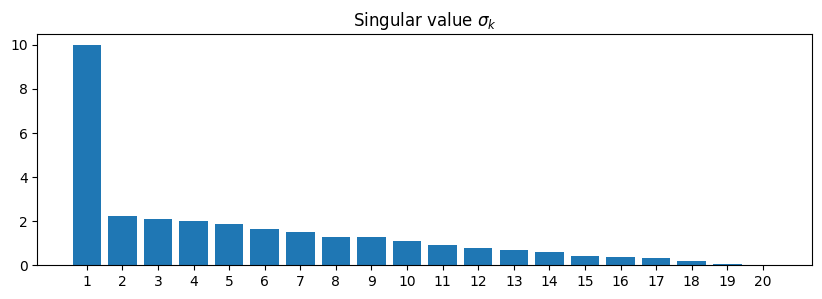

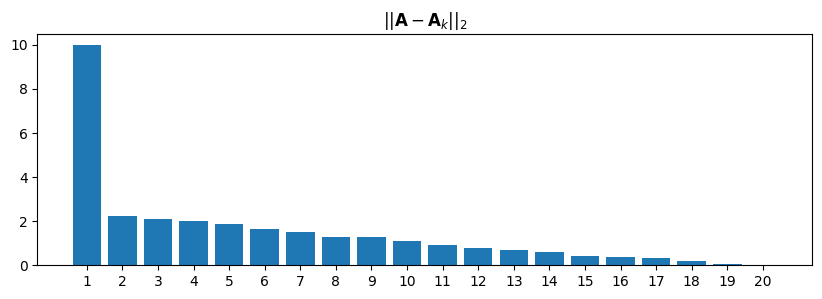

: 

In [ ]:
n = 20
index = np.arange(1, n+1)
A = np.random.random((n, n))
U, S, V = la.svd(A)

plt.figure(figsize=(10,3))
plt.title("Singular value $\sigma_k$")
plt.bar(index, S)
plt.xticks(index)
plt.show()

# recontruction de rang k et calcul de la norme 2 associee par rapport a la matrice complete
norms = []
comps = list(range(n))
for i in range(n):
    Ak = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
    norms += [la.norm((A-Ak),2)]

plt.figure(figsize=(10,3))
plt.title("$||{\mathbf{A}}-{\mathbf{A}_k}||_2$")
plt.bar(index, norms)
plt.xticks(index)
plt.show()



This equality also allows us to compress information contained in a matrix with a minimumized lost information. Let's see the visual impact of this decomposition on a 512*512 black and white image (each pixel is stocked in a matrix with a value encoded on 256 grey levels). We are going to reconstruct this image with 1, 5, 10, 15, 20, 50, 100, 200 singular values and observe how it affect it.

(512, 512)
(512, 512) (512,) (512, 512)


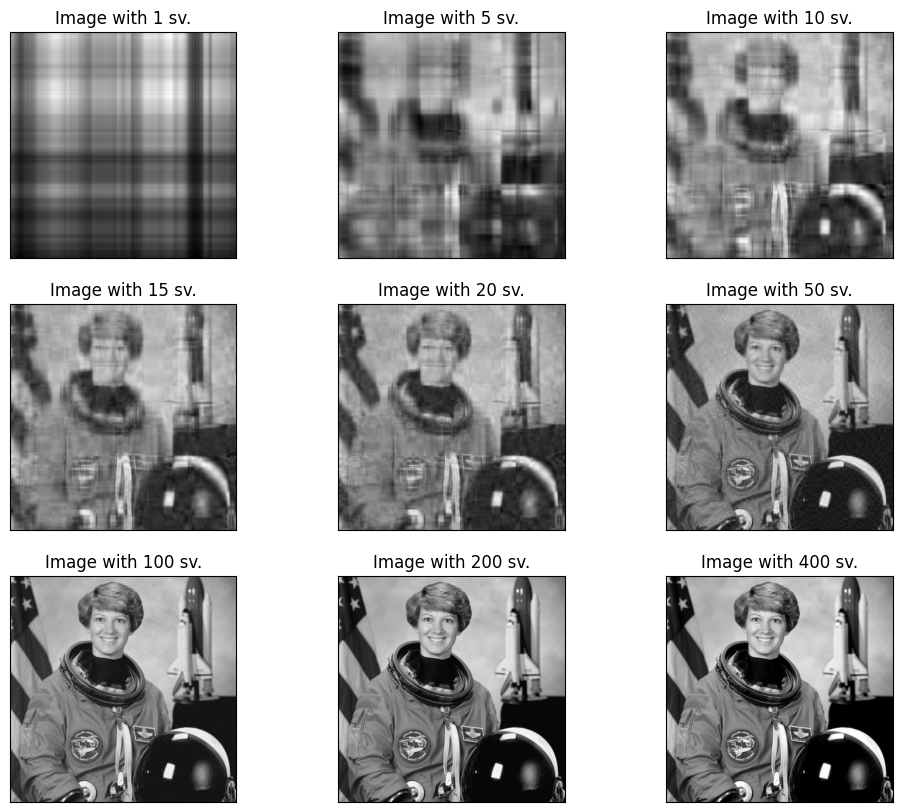

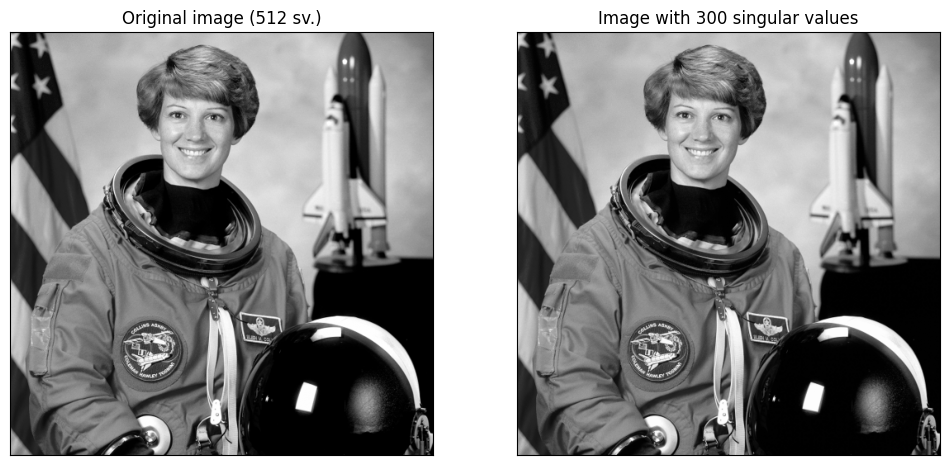

In [ ]:
from skimage import data
from skimage.color import rgb2gray


image = data.astronaut()
image = np.asarray(rgb2gray(image))


# SVD
U,S,V = la.svd(image)

# Singular values number
comps = [1, 5, 10, 15, 20, 50, 100, 200, 400]

plt.figure(figsize=(12, 10))
for i in range(len(comps)):
    image_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
    plt.subplot(3, 3, i+1),
    plt.imshow(image_rank, cmap='gray'),
    plt.title(f'Image with {comps[i]} sv.')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_ticks([])
    frame1.axes.get_yaxis().set_ticks([])



plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original image (512 sv.)')
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])

plt.subplot(1, 2, 2)
image_rank = U[:, :400] @ np.diag(S[:400]) @ V[:400, :]
plt.imshow(image_rank, cmap='gray')
plt.title('Image with 300 singular values')
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.show()


# TODO Tracer les sv uniques et non leur somme


The error of the reconstructed matrices is decreasing exponentially with the number of singular values used (it follows the previous graph of $\|{\mathbf{A}}-{\mathbf{A}_k}\|_2$)

## 4. SVD applied to function approximation

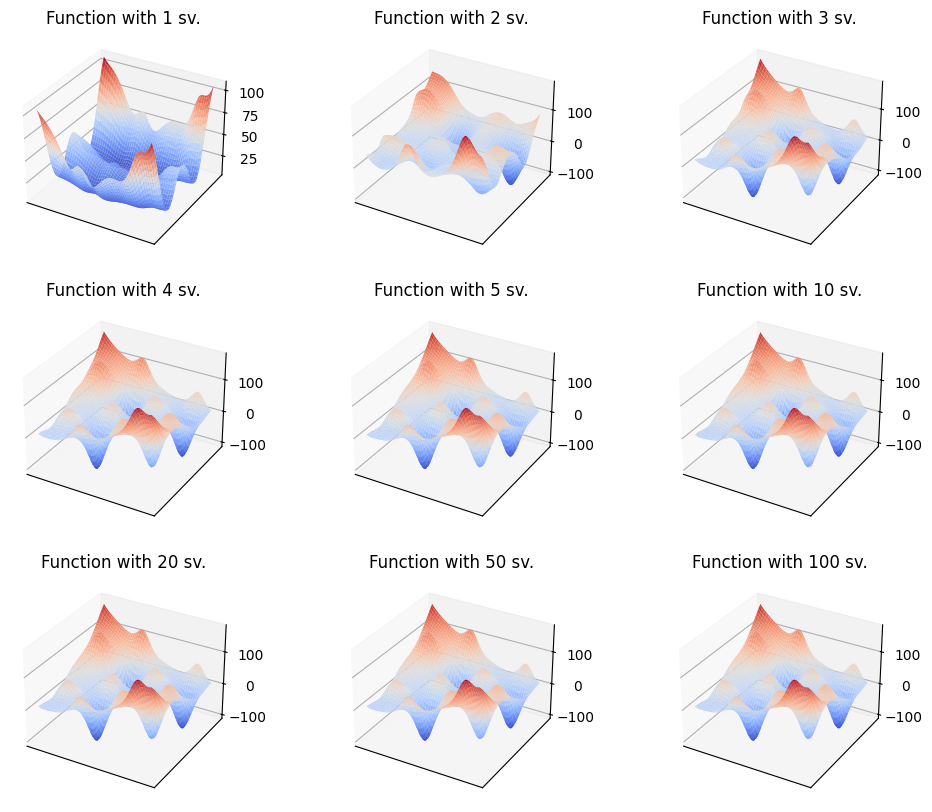

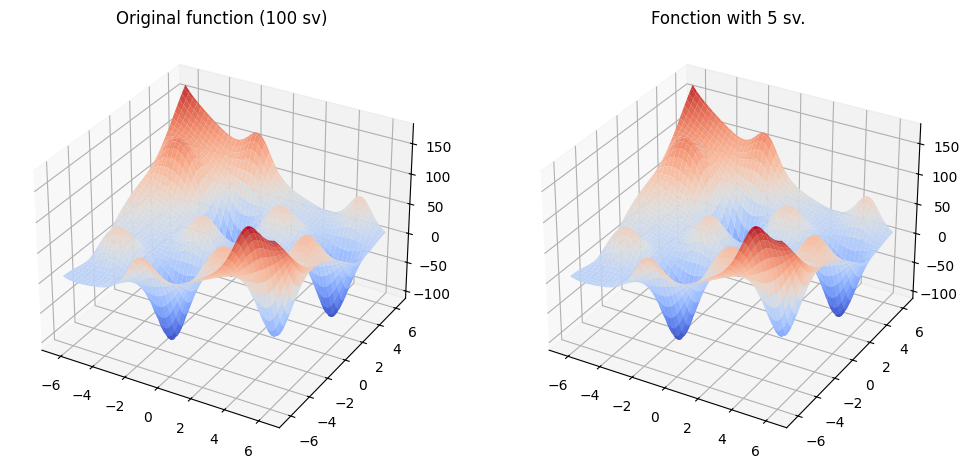

In [ ]:
import math
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt


def bird(x,y):
 return np.sin(x)*(np.exp(1-np.cos(y))**2) + np.cos(y)*(np.exp(1-np.sin(x))**2) + (x-y)**2

x= np.linspace(-2*math.pi, 2*math.pi,100)
y= np.linspace(-2*math.pi, 2*math.pi,100)
X,Y = np.meshgrid(x,y)
Z = bird(X,Y)
birdarray = np.asarray(Z)

# SVD
U,S,V = la.svd(birdarray)


# Singular values number
comps = [1, 2, 3, 4, 5, 10, 20, 50, 100]
fig=plt.figure(figsize=(12, 10))


for i in range(len(comps)):
    bird_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
    ax=fig.add_subplot(330+i+1,projection='3d')
    ax.plot_surface(X,Y,bird_rank,cmap='coolwarm')
    plt.title(f'Function with {comps[i]} sv.')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_ticks([])
    frame1.axes.get_yaxis().set_ticks([])

fig=plt.figure(figsize=(12, 6))
ax=fig.add_subplot(121,projection='3d')
ax.plot_surface(X,Y,Z,cmap='coolwarm')
plt.title('Original function (100 sv)')
ax=fig.add_subplot(122,projection='3d')
bird_rank = U[:, :5] @ np.diag(S[:5]) @ V[:5, :]
ax.plot_surface(X,Y,bird_rank,cmap='coolwarm')
plt.title('Fonction with 5 sv.')
plt.show()

## 5. PCA